# Tests pour le module des nanoparticules

In [1]:
#%matplotlib notebook
%matplotlib inline
#%matplotlib qt

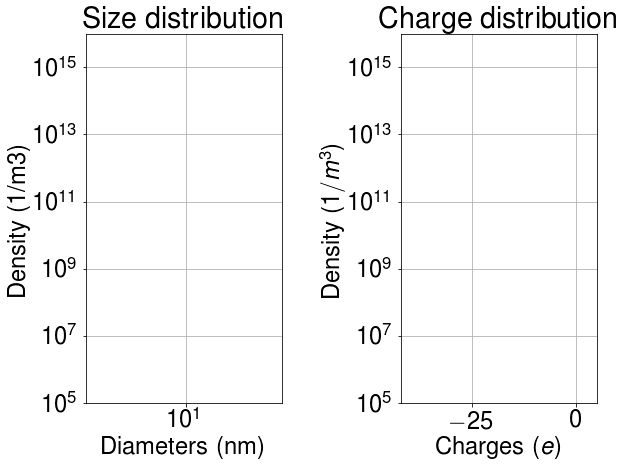

In [2]:
#always reload modules
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import aplot as pp
from IPython.display import HTML

In [3]:
xc = pp.xmlcfg()
xc.load("config.xml")
xc.parse()

In [4]:
#xc = pp.xmlcfg()
#xc.load('config.xml')
#xc.parse()

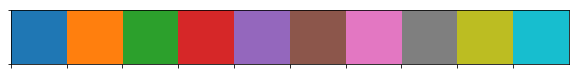

In [5]:
current_palette = pp.sns.color_palette()
#sbn.set_style('darkgrid', {'axes.linewidth': '1', 'axes.edgecolor': '0.15'})
#sbn.palplot(current_palette = sbn.color_palette())
pp.sns.palplot(current_palette)

In [24]:
#prefix = "Tfit2-lim5nm-0.08"#"XFP2-ts0.1-tf1e2"#"Tfix3-0.08"#"Tnew-0.06"#"lim5nm"#"z6-all"#"imag10"
#prefix = "goodtest100-stride"
#prefix = "goodtest2s"
#nanof = "nano-diff"
#nanof = "nano-odeint-qts0.01"
#nanof = "nano-odeint-qts0.01-notun"
#nanof = "nano-odeint-qts0.1-notun"
# nanof = "nano-odeint-qts0.01-mpc"
#nanof = "nano-odeint-qts0.1-wco-wch-nimag"
#nanof = "nano-odeint-qts0.1"
#nanof = "nano-odeint-qts0.1-wco-wch"
#gridf = "grid-clone"
#nanof = "nano-notun-0.05s"
#gridf = "grid-bin-20x30-clone"

#nanof = "nano-all-minimal-t0.1"
#gridf = "grid-b1.8-20x35"

# nanof = "nano-charging-et-heij"
# no selection for tunnel current
#nanof = "nano-charging-noet-heij"
#nanof = "nano-borrar"
# mamunuru
#nanof = "nano-charging-base-2eV"
#nanof = "nano-charging-noet-base-2eV"
# nanof = "nano-all-nocharging-t0.05"
#nanof = "nano-all-t0.5-dt1e-6"
#nanof = "nano-all-t0.1-dt1e-6"
#nanof = "nano-all-t0.1-dt1e-6-cut"

nanof = "nano-all-t0.5-dt1e-6-cut"
gridf = "grid-base-clone"

# nanof = "nano-charging-40x200"
# gridf = "grid-40x200-IPA"
pt = pp.plot(nanof, gridf, xc)


In [25]:
pt.levelsf = np.arange(1, 19, 2)

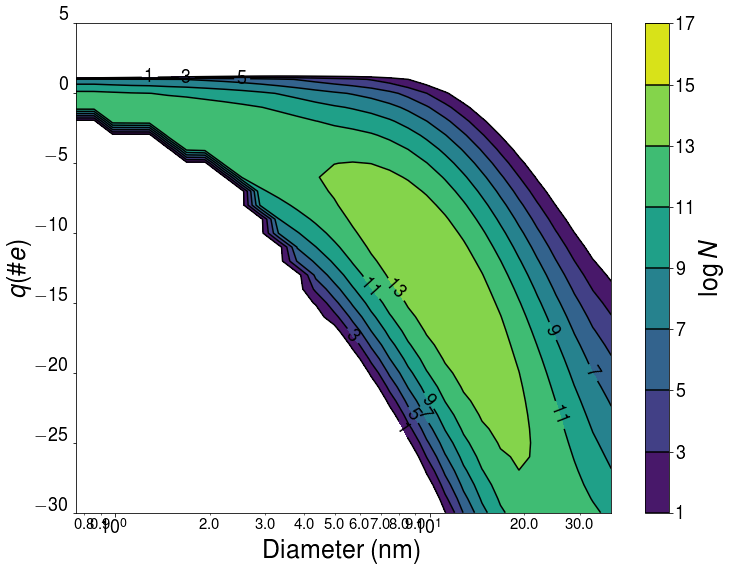

In [26]:
pt.plot_fdens()

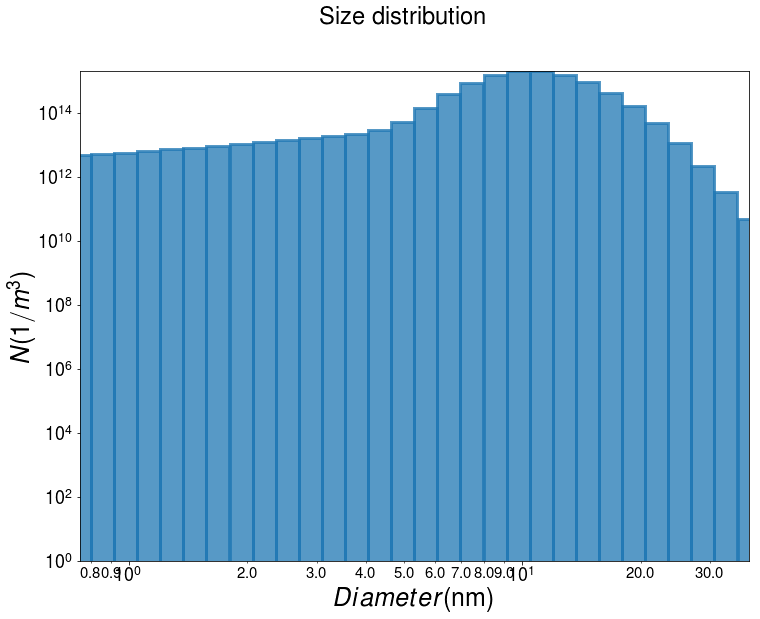

In [27]:
pt.plot_diams()

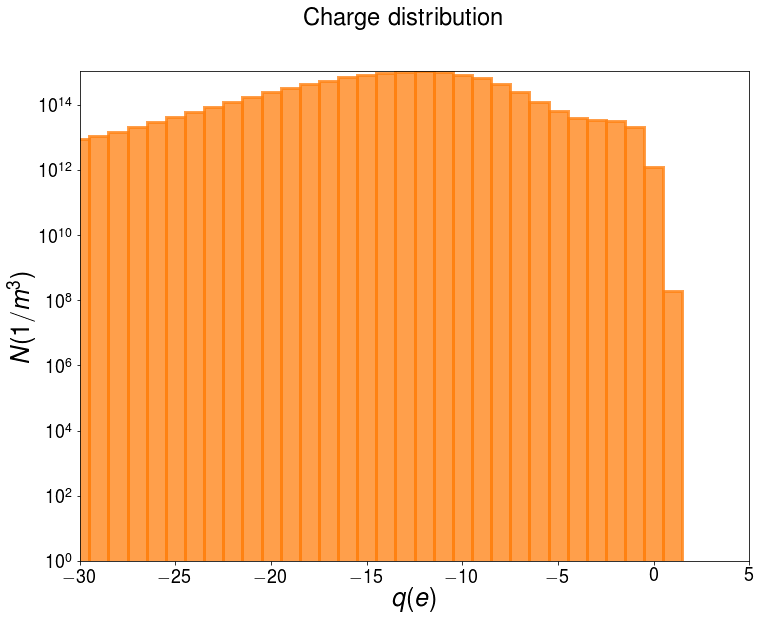

In [28]:
pt.plot_charges()

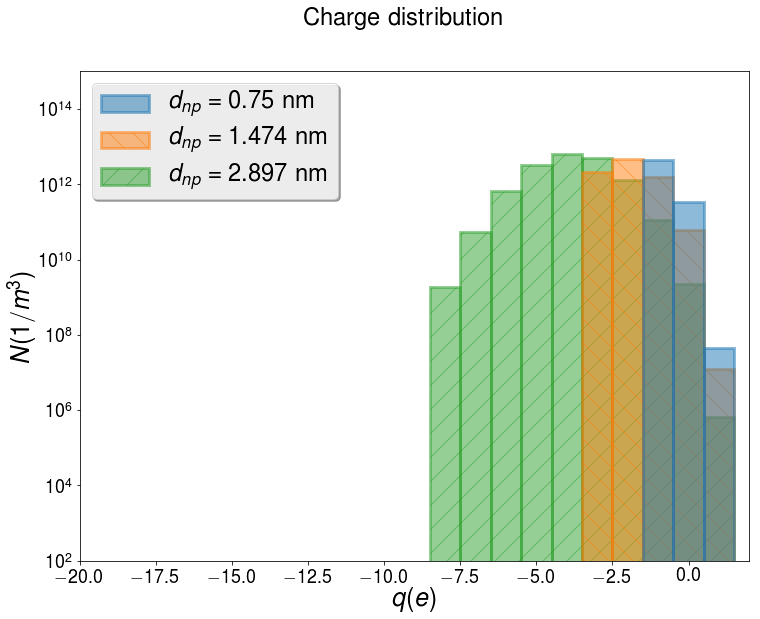

In [29]:
#WARNING density must be > 0 in the section
pt.plot_charges_at_volume([0, 5, 10], [3,2,1], current_palette,
                         [True, True, True], ['', '\\', '/'], [0.5, 0.5, 0.5],
                          [3, 3, 3], ylim=[1e2, 1e15])

In [66]:
res = pp.read_results("../results/"+prefix, xc)
dens = pp.NanoFile.get("density")
dens_dict = dict(dens)
ordered_keys = sorted(dens_dict)
dens_list = []
time_list = []
for key in ordered_keys:
    dens_list.append(np.array(dens_dict[key]))

diam_dens = np.array([np.sum(dens_elem, axis=0) for dens_elem in dens_list])
chrgs_dens = np.array([np.sum(dens_elem, axis=1) for dens_elem in dens_list])
stride = 10
dist_dens = [diam_dens[1::stride], chrgs_dens[1::stride]]

NameError: name 'prefix' is not defined

In [9]:
NT = np.sum(diam_dens, axis=1)

NameError: name 'diam_dens' is not defined

In [10]:
#np.argmax(NT)

In [11]:
QT = np.array([np.sum(chrgs*pp.QPivots) for chrgs in chrgs_dens])
#QT = np.array([chrgs[-7] for chrgs in chrgs_dens])

NameError: name 'chrgs_dens' is not defined

In [12]:
pp.DBoxes = pp.AX1.bar(pp.DPivots, pp.DDens, pp.WidthDPivots)

ValueError: min() arg is an empty sequence

In [ ]:
pp.QBoxes = pp.AX2.bar(pp.QPivots, pp.QDens, pp.WidthQPivots, color='red')

In [ ]:
#Ani = animation.FuncAnimation(pp.FIG, pp.updateplot, frames=len(dens_list),fargs=(diam_dens, ), init_func=None, blit=False)
Ani = animation.FuncAnimation(pp.FIG, pp.updateplot, frames=len(dist_dens[0]),fargs=(dist_dens,), init_func=None, blit=False)
plt.show()

In [ ]:
plt.draw()

In [ ]:
HTML(Ani.to_html5_video())

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    

In [ ]:
#Ani.save('test.mp4', writer=writer)

## Plasma properties

In [ ]:
fd = np.loadtxt("/home/ben/PhD-INRS/inrs-sources/C++/duster/results/"+prefix+"-dens.dat")

In [ ]:
time = fd[:,0]

In [ ]:
energy = fd[:,1]

In [ ]:
ne = fd[:,2]

In [ ]:
ni = fd[:,3]

In [ ]:
nm = fd[:,4]

In [ ]:
nd = fd[:,5]

In [ ]:
# Customizations
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['lines.linewidth'] = 2

In [ ]:
fig=plt.figure(figsize=(7,7))
plt.xlabel("time (s)")
plt.xscale('log')
#plt.xlim([1.0,100])
plt.ylabel(u"Density ($1/m^3$)")
plt.yscale('log')
plt.ylim([5e14, 5e17])
plt.plot(time, ne, label="$n_e$", zorder=1)
#plt.plot(time, ni, '--', label="$n_i$", zorder=2, lw=4)
plt.plot(time, nm, label="$n_m$", zorder=3)
plt.plot(time, nd, label=u"$n_\\varepsilon$", zorder=4)
plt.legend(loc='upper left', shadow=True)
plt.savefig(prefix+"-plasma-dens.png")
plt.show()

In [ ]:
diffloss = fd[:,6]
eloss = fd[:,8]
iloss = fd[:,9]
nrgloss = fd[:,10]
fig=plt.figure(figsize=(7,7))
plt.xlabel("time (s)")
plt.xscale('log')
#plt.xlim([1.0,100])
plt.ylabel(u"Loss ($1/m^3s$)")
plt.yscale('log')
plt.ylim([1e15, 10e22])
plt.plot(time, diffloss, label="Diffusion", zorder=1)
plt.plot(time, eloss, label="Electrons", zorder=2)
plt.plot(time, abs(iloss), label="Ions", zorder=3)
plt.plot(time, abs(nrgloss), label=u"Energy ($eV/m^3s$)", zorder=4)
plt.legend(loc='lower left', shadow=True)
plt.savefig(prefix+"-plasma-loss.png")
plt.show()

In [ ]:
nptime = time[len(time)-len(NT):]
#len(nptime)

In [ ]:
fig, ax1 = plt.subplots(figsize=(7,7))

ax1.plot(nptime[1:], NT[1:], 'g-', lw=2)
ax1.set_xlabel('time (s)')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Particle density ($1/m^3$)', color='g')
for tl in ax1.get_yticklabels():
    tl.set_color('g')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.set_ylim([0,2e16])
ax2 = ax1.twinx()
ax2.plot(nptime[1:], -QT[1:], 'b-', lw=2)
ax2.set_ylabel('Total charge (e)', color='b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
ax2.set_ylim([0,2e16])
#ax2.set_yscale('log')
ax2.set_xlim([0,0.6])
plt.savefig(prefix+"-np.png")
plt.show()

In [ ]:
prefix = "imag"
pt = pp.plot("../results/"+prefix, xc)
pt.print_moments()

In [ ]:
prefix = "goodtest100-stride"
pt = pp.plot("../results/"+prefix, xc)
pt.print_moments()

In [ ]:
import itertools
import sys

import os

import h5py

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

import matplotlib.animation as animation

import matplotlib.mlab as mlab

from matplotlib.ticker import MultipleLocator, LinearLocator, FormatStrFormatter, LogLocator, LogFormatterExponent

from matplotlib import cm

from matplotlib.colors import LogNorm

import seaborn as sns

current_palette = sns.color_palette()

In [ ]:
class mplot4d():
  def __init__(self, h5gridprefix = None, xc = None):

    self.xc = xc
    #if xc is None:
      #self.xc = xmlcfg()
      #yield

    self.defpath = r'/home/ben/ndust/data/'
    
    self.h5gridprefix = h5gridprefix
    self.h5gridprefix = self.defpath + self.h5gridprefix

    # Read grid file
    self.gridfname = self.h5gridprefix + '.h5'
    self.gridfile =  h5py.File(self.gridfname, 'r')

    ## group volumes
    self.gvols = self.gridfile.get("Volume_sections")
    self.vifaces = np.array(self.gvols.get("Interfaces"))

    ## interfaces in diameters nm
    self.vifaces_diam = np.power(6.0*self.vifaces/np.pi, 1.0/3.0)*1E9

    ## WARNING diameter pivots in nanometres
    self.vpivots = np.array(self.gvols.get("Volumes"))

    ## pivots in diameters
    self.dpivots = np.array(self.gvols.get("Diameters"))*1E9

    ## group charges
    self.gchgs = self.gridfile.get("Charge_sections")

    self.qpivots = np.array(self.gchgs.get("Charges"))
    #self.qifaces = np.append()
    #np.array(self.gchgs.get("qifaces"))

    self.width_vpivots = self.vifaces_diam[1:] - self.vifaces_diam[:-1]
    self.width_qpivots = np.ones_like(self.qpivots)

    # make grid
    self.X, self.Y = np.meshgrid(self.dpivots, self.qpivots)

    # density group
#     self.gdensity = self.nanofile.get("Density")
#     self.result = np.array(self.gdensity.get("density"))
#     self.res_gt_0 = self.result > 0
#     self.log10res = np.zeros_like(self.result)
#     self.log10res[self.res_gt_0] = np.log10(self.result[self.res_gt_0])

    self.extents_linear = [0, len(self.dpivots), 0, len(self.qpivots)]

#     self.ddens = np.sum(self.result, axis=0)
#     self.cdens = np.sum(self.result, axis=1)

    self.gcoagulation = self.gridfile.get("Coagulation_rate")
    self.gefactor = self.gridfile.get("Enhancement_factor")

  def get(self, name):
    efactor = np.array(self.gefactor.get(name))
    # get one dataset for testing    
    result = np.array(self.gcoagulation.get(name))
    res_gt_0 = result > 0
    log10res = np.zeros_like(result)
    log10res[res_gt_0] = np.log10(result[res_gt_0])
    return result, log10res, efactor

  def close(self):
    self.gridfile.close()

  def plot_fcontours(self, ax, data, levelsf=None, cmap=cm.plasma):
    """
    """

    if levelsf is None:
      levelsf = np.arange(1, 18, 2)

    norm = mpl.colors.Normalize(vmin=levelsf[0], vmax=levelsf[-1])
#     self.axis(axislabel)
#     self.minorticks(fig)


#     CSF = ax.pcolormesh(X, Y, data, cmap=cmap)#,
#                       #extent=self.extents_linear)

    CSF = ax.contourf(self.X, self.Y, data, levelsf, cmap=cmap, origin='lower', norm=norm,
                      extent=self.extents_linear)
    
  def plot(self, llist, qlist, levelsf=np.logspace(0, 3, 20)):
    data = []
    combinations = np.array(np.meshgrid(llist, qlist)).T.reshape(-1, 2)
#     for cpair in combinations:
        
    for ll in llist:
        for ql in qlist:
            # iterate in datasets of gefactor
            for ds in m4d.gefactor.keys():
                lp = m4d.gefactor.get(str(ds)).attrs.get('l')
                qp = m4d.gefactor.get(str(ds)).attrs.get('q')
                if(ll==lp and ql==qp):
                    data.append(np.array(m4d.gefactor.get(str(ds))))
#         data.append(self.get(rl)[2])

    fig, axes = plt.subplots(nrows=len(qlist), ncols=len(llist), figsize=(len(qlist)*3.5, len(llist)*3.5))
#     plt.setp(axes.flat, xticks=[], yticks=[])

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

#         # Set up ticks only on one side for the "edge" subplots...
#         if ax.is_first_col():
#             ax.yaxis.set_ticks_position('left')
#         if ax.is_last_col():
#             ax.yaxis.set_ticks_position('left')
#         if ax.is_first_row():
#             ax.xaxis.set_ticks_position('bottom')
#         if ax.is_last_row():
#             ax.xaxis.set_ticks_position('bottom')
            
    i=0
    for col, l in zip(axes.T, llist):
      for ax, q in zip(col, qlist):        
        self.plot_fcontours(ax, data[i], levelsf=levelsf, cmap=cm.plasma)
        i = i+1

    # for ax, r in zip(axes[0], r1):    
    #     for ax, q in zip(axes[:, -1], q1):
    #         plot_fcontours(ax, m4d.X, m4d.Y, ef28, levelsf=np.logspace(0, 3, 20))
    # Label rows and columns

    for ax, l in zip(axes[0], llist):
        ax.set_title(str(self.dpivots[l]), size=14)
        ax.yaxis.set_visible(True)

    for ax, q in zip(axes[:, -1], qlist):
        ax.set_ylabel(str(self.qpivots[q]), size=14)
        ax.yaxis.set_label_position("right")
        ax.get_yaxis().set_ticks([])
        ax.yaxis.set_visible(True)


    for ax, q in zip(axes[:, 0], qlist):
        ax.set_ylabel('Charge of particle 1', size=14)
        ax.yaxis.set_label_position("left")
        ax.yaxis.set_ticks_position('left')
        ax.yaxis.set_visible(True)
        
    for ax, l in zip(axes[len(llist)-1], llist):
        ax.xaxis.set_ticks_position('bottom')
        ax.set_xlabel('Diameter of particle 1', size=14)
        ax.xaxis.set_visible(True)
        
# #     Turn on the proper x or y axes ticks.
#     for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
#         axes[j,i].xaxis.set_visible(True)
#         axes[i,j].yaxis.set_visible(True)

#     print(axes)
#     [axes[len(llist)-1, j].xaxis.set_visible(True) for j in llist]
    plt.show()
        

In [ ]:
sns.set_style('darkgrid', {'axes.linewidth': '1', 'axes.edgecolor': '0.15'})
m4d = mplot4d("grid")

In [ ]:
ll=[0, 2, 4, 10]
ql=[28, 29, 30, 31]

In [ ]:
m4d.plot(ll, ql)

In [ ]:
m4d.close()